# Using Jupyter Notebooks for Online Instruction
# Prof. John T. Whelan [jtwsma@rit.edu](mailto:jtwsma@rit.edu)
# School of Mathematical Sciences (Statistics)
# RIT College of Science Webinar
# 2019 September 25

This notebook online
 - download: <http://ccrg.rit.edu/~whelan/talks/whelan20190925.ipynb>
 - view: <https://nbviewer.jupyter.org/urls/ccrg.rit.edu/~whelan/talks/whelan20190925_static.ipynb>
 - run: <https://mybinder.org/v2/gl/jtwsma%2F201909_webinar/master?filepath=whelan20190925.ipynb>

## Abstract

*Jupyter Notebook is an open, interactive format that allows formatted text,
including mathematical notation, to be interspersed with executable computer
code in one of several languages including Python and R. Jupyter notebooks run
in a web browser, with the program being executed on a local or remote server. 
They have been used for outreach demonstrations for projects such as LIGO,
electronic logbooks for computational research projects, and homework
supplements for traditional on-campus courses.*

*I will describe and demonstrate the use of Jupyter notebooks running Python,
specifically Scientific Python and the matplotlib plotting library, in an online
graduate statistics course.  Interactive lesson notebooks replace the
traditional course lecture, and allow mathematical explanations to exist
side-by-side with computational demonstrations.  Assignments are provided in the
form of notebooks with blank cells to solve problems, either analytically or
computationally, and solutions are completed versions of these same notebooks. 
The ability to provide computational tools and recipes within the notebooks also
simplifies the assignment of computational problems.*

## Motivation

- Context: STAT-753: Nonparametric Statistics and Bootstrapping (RIT Stats MS/AC elective) online Fall 2019
- When teaching stats, I often alternate between formal derivations & numerical demonstrations
- Numerical exercises are (IMHO) a valuable part of coursework in stats & quantitative sciences
  - Manipulate realistic datasets
  - Replace archaic back-of-the-book tables w/software lookup
  - Illustrate probability w/Monte Carlo simulations
  - Flexible numerical data analysis is a useful transferrable skill
  - $\heartsuit$ Aim for the sweet spot: software computes & looks up, but student still does the thinking & constructing<br>(**NOT** a black box)
- Teaching online $\ne$ teaching on campus
  - Asynchronous
  - Active
  - Leverage alternatives to recorded lectures
- Approach: ~~lectures~~lessons, homeworks, exams all as Jupyter notebooks
  - Combine text, math, computation & plots
  - Interactive
  - Editable

## What is Jupyter?

- Originally "ipython notebook"
  - Inspired by Mathematica notebooks?
  - ipython = interactive python
- Now supports several languages (**JU**lia + **PYT**hon + **R**)
- `.ipynb` notebook files (ASCII JSON format)
- Made up mostly of "markdown" & "code" cells
  - markdown = formatted text (including some LaTeX)
  - code = executable code (Python in this case)
- Run in web browser
  - Jupyter starts dedicated web server on local machine, or can run on remote server
  - For STAT 753, instructed students to install anaconda python dist & download notebooks

## Available tools

Simple python trick: powers of 2

In [ ]:
'; '.join([('2^%d=%g' % (x,2**x)) for x in range(30)])

### Numpy

Numerical python; defines array data type used by many data processing tools.

In [ ]:
import numpy as np

In [ ]:
myints = np.arange(30); myints

Numpy arrays support vectorized operations:

In [ ]:
2**myints

### SciPy

Scientific python; particularly useful is the `stats` library.

In [ ]:
from scipy import stats

Can be used to "look up" percentiles, tail probabilities, etc.  No "table in back of book" needed:

In [ ]:
# 99th percentile of standard normal
stats.norm.ppf(0.99)

In [ ]:
# Probability of 5 or fewer successes in binomial experiment w/20 trials, p=0.4
stats.binom(20,0.4).cdf(5)

Can also draw (pseudo-)random samples from probability distributions:

In [ ]:
# Seed the random number generator so this notebook will give the sane values
np.random.seed(8675309)
# Sample of size 10 from a chi^2 distribution w/5 degrees of freedom
stats.chi2(df=5).rvs(size=10)

### Matplotlib

Plotting library; Numpy+SciPy+Matplotlib provide a powerful replacement for matlab.

In [ ]:
%pylab inline

In [ ]:
rcParams['figure.figsize'] = (8.0,5.0)
rcParams['font.size'] = 14

In [ ]:
x = np.linspace(0,1,100)
fx = stats.beta(2,4).pdf(x)
plot(x,fx);
title('pdf of Beta(2,4) distribution');
xlabel('$x$');
ylabel('$f(x)$')
xlim(0,1);
grid(True);

## Example: Lesson

In the last lesson we considered confidence intervals, which are a form of
parameter estimation. Another major sort of statistical inference, and
one which can be easily extended to nonparametric scenarios, is
**hypothesis testing**. Given a set of data
${{\mathbf{x}}}\equiv x_1,\ldots,x_n\equiv\{x_i\}$, we wish to
distinguish between two competing statements about the probability
distribution $f({{\mathbf{x}}})$ describing the random vector
${{\mathbf{{\color{royalblue}{X}}}}}$ of which ${{\mathbf{x}}}$ is supposed
to be an instance. We call them the **null hypothesis** $H_0$ and the
**alternative hypothesis** $H_1$. In a Bayesian approach we would make
some comparison between posterior probabilities $P(H_0|{{\mathbf{x}}})$
and $P(H_1|{{\mathbf{x}}})$, but in the classical formulation we have to
make some indirect statement involving the possible probability
distributions for ${{\mathbf{{\color{royalblue}{X}}}}}$.

Classical hypothesis testing treats the two hypotheses differently. The
null hypothesis $H_0$ tends to describe the absence of some effect which
is present in $H_1$. A hypothesis test is a rule for choosing between
two alternatives given the observed data ${{\mathbf{x}}}$, but it’s not
as simple as “pick $H_0$” or “pick $H_1$”. Rather, the two possibilities
are

1.  Reject $H_0$ (in favor of $H_1$).

2.  Don’t reject $H_0$.

At no point do we actually *accept* either hypothesis. And in
particular, a negative test result doesn’t mean we rule out the effect
described by $H_1$; it might be that the data just don’t contain enough
information to see it. As a matter of terminology, the set of all points
in the $n$-dimensional “sample space” (whose coordinates are
$(x_1,\ldots,x_n)$) for which the test says to reject $H_0$ is known as
the **critical region** or **rejection region**.

To give a concrete example, consider a sample of size $n$ drawn from
some distribution with a finite mean $\mu$ and variance $\sigma$. Let
$H_0$ specify that $\mu=0$ and $H_1$ that $\mu>0$. We define a test that
rejects $H_0$ if
$$z = \frac{{{\overline{x}}}}{\sigma/\sqrt{n}} > 1.645$$ (where
${{\overline{x}}}$ is the sample mean of the data and we assume both
hypotheses specify the value $\sigma$ of the population standard
deviation) and fails to reject if $z\le 1.645$. The value $z$ is a
realization of the random variable
$${\color{royalblue}{Z}} = \frac{{\color{royalblue}{{{\overline{X}}}}}}{\sigma/\sqrt{n}}$$
which is known as a **test statistic**.

### Significance

If there were no uncertainty or randomness, the outcome of a hypothesis
test would be definitive. If $H_1$ were true, the test would reject
$H_0$, and if $H_0$ were true, the test would not reject it. But of
course, there is a chance that the test will give the “wrong” answer.
Rejecting $H_0$ if it’s true is known as a **Type I Error** or a false
alarm. Not rejecting $H_0$ if $H_1$ is true is known as a **Type II
Error** or a false dismissal.

The probability of a false alarm occurring is written $\alpha$ and known
as the **significance** of the test. If $H_0$ uniquely determines a
sampling distribution $P({{\mathbf{x}}}|H_0)$, it is known as a **point
hypothesis** and we can just write the probability that the data will
end up in the critical region, assuming $H_0$ is true. For instance, in
the example considered above, if $n$ is large, the Central Limit Theorem
tells us that the test statistic ${\color{royalblue}{Z}}$ is a standard
normal random variable, and therefore
$$\alpha = P({\color{royalblue}{Z}}>1.645|\mu{\mathbin{=}}0)
  \approx P({\color{royalblue}{Z}}>z_{.95}|\mu{\mathbin{=}}0) \approx 0.05$$
We say that the test has significance $\alpha=5\%$. (Note this name is
somewhat misleading, since rejecting $H_0$ with test with a smaller
$\alpha$ level, would actually be a *more* significant result.) If the
null hypothesis $H_0$ does not completely specify the sampling
distribution (e.g., if we had chosen $\mu\le 0$ rather than $\mu=0$) it
is known as a **composite hypothesis**, and $\alpha$ is defined to be
the maximum of all the false alarm probabilities associated with the
different distributions allowed by $H_0$. (In this case that would turn
out to be when $\mu=0$ anyway, so the significance would still be
$5\%$.)

We can use a Monte Carlo simulation to illustrate/check the significance of the test we've just defined.  In principle, our test is supposed to work for any sampling distribution, but we'll use a normal distribution for convenience:

In [ ]:
nulldist = stats.norm(scale=5)
sigma = nulldist.std()
print('Null distribution has mu=%g and sigma=%g' % (nulldist.mean(),sigma))

We'll generate $N_{\text{monte}}=1000$ samples of size $n=50$, and call them $\{x_i^{(I)}\}$:

In [ ]:
n = 50
Nmonte = 1000
np.random.seed(20190903)
x_Ii = nulldist.rvs(size=(Nmonte,n))

As we did when constructing confidence intervals, we take the mean of each sample, $\overline{x}^{(I)}=\frac{1}{n}x_i^{(I)}$, and also construct the test statistic $z^{(I)}=\frac{\overline{x}^{(I)}}{\sigma/\sqrt{n}}$:

In [ ]:
xbar_I = np.mean(x_Ii,axis=-1)
z_I = xbar_I/(sigma/np.sqrt(n))

We can count how many of the 1000 $z^{(I)}$ are above the threshold of $1.645$ with a Boolean array:

In [ ]:
reject_I = z_I>1.645; reject_I

In [ ]:
print('Simulating with H_0 (mu=0), we reject H_0 %d times out of %d, or %g of the time'
      % (np.sum(reject_I),Nmonte,np.mean(reject_I)))

You can go back and try some other distribution.  As long as the mean is zero and the standard deviation is finite, it should still give you about 5\% significance.

### Power of a Test

The probability of a type II error (false dismissal) occurring, i.e.,
failing to reject the null hypothesis $H_0$ when the alternative
hypothesis $H_1$ is true, is written $\beta$. The probability of
*rejecting* $H_0$ when $H_1$ is true is called the **power** of the
test, $\gamma=1-\beta$. Since the alternative hypothesis is often a
composite hypothesis, the power of a test can depend on the value of any
parameters that are not completely specified by $H_1$. We can talk about
a **power curve** $\gamma(\theta)$ where $\theta$ is the parameter in
question.

For example, in the test above based on the sample mean, the Central
Limit Theorem still tells us that
$$\frac{{\color{royalblue}{{{\overline{X}}}}}-\mu}{\sigma/\sqrt{n}}  = {\color{royalblue}{Z}} - \frac{\mu}{\sigma/\sqrt{n}}$$
is standard-normal distributed whatever the value of $\mu$, which means
${\color{royalblue}{Z}}$ is normally distributed with unit variance but
nonzero mean $$E({\color{royalblue}{Z}}) = \frac{\mu}{\sigma/\sqrt{n}}$$
which means the power curve is
$$\gamma(\mu) = P({\color{royalblue}{Z}}>1.645|\mu)
  = 1-\Phi\left(1.645-\frac{\mu}{\sigma/\sqrt{n}}\right)$$ We can plot
this

In [ ]:
muscaled = np.linspace(0,5,1000)
gamma = stats.norm.sf(1.645-muscaled)
plot(muscaled,gamma)
title(r'Power for one-sided $z$ test with $\alpha=0.05$')
xlabel(r'$\frac{\mu}{\sigma/\sqrt{n}}$')
ylabel(r'$\gamma(\mu)$')
xlim(0,5)
ylim(0,1)
grid(True)

One thing to note is that the power $\gamma(\mu)$ goes to $0.05$ (which
is the significance $\alpha$) as $\mu$ goes to $0$ (which is the value
specified by $H_0$). Also, $\gamma(\mu)>\alpha$ for all $\mu>0$. This is
a generally desirable property (the test should be more likely to reject
$H_0$ when it’s false than when it’s true), and so it has a name. In
general, an **unbiased test** is one for which $\gamma\ge\alpha$ for all
possible point hypotheses contained within $H_1$.

We can also estimate this numerically using Monte Carlo methods.  For instance, if we generate data from a distribution with a non-zero $\mu$, we can run the hypothesis test on each of the samples:

In [ ]:
mu1scaled = 2.
mu1 = mu1scaled * sigma / np.sqrt(n)
x1_Ii = stats.norm(loc=mu1,scale=sigma).rvs(size=(Nmonte,n))
x1bar_I = np.mean(x1_Ii,axis=-1)
z1_I = x1bar_I/(sigma/np.sqrt(n))
print('Simulating with H_1 (mu=%g), we reject H_0 %d times out of %d, or %g of the time'
      % (mu1,np.sum(z1_I>1.645),Nmonte,np.mean(z1_I>1.645)))
print('compared to a theoretical value of %g' % stats.norm.sf(1.645-mu1scaled))

We can plot an empirical power curve by taking an array of $\mu$ values and repeating the Monte Carlo test for each of them.  Now, this sounds kind of daunting, since we have 1000 values of $\mu$ and 1000 Monte Carlo trials, so if we repeated the Monte Carlo simulation, drawing a sample from from $N(\mu,\sigma^2)$ for each $\mu$, that would be a million samples.  Fortunately, the way the statistic is constructed means that we can actually re-use the Monte Carlo samples that we generated from $N(0,\sigma^2)$.  Since $\mu$ is a scale parameter, we can draw a sample from $N(\mu,\sigma^2)$ directly, or draw it from $N(\mu,\sigma^2)$ and then add $\mu$ to each value in the sample, $x_i\rightarrow x_i+\mu$.  And since the sample mean $\overline{x}$ is the average of those values, the effect of adding $\mu$ to each of the $\{x_i\}$ is just to add $\mu$ to $\overline{x}$.  That means if we have a set of sample means $\{\overline{x}^{(I)}\}$ from Monte Carlo samples drawn from $N(0,\sigma^2)$ (which we do in the form of `xbar_I` abovr), we can get something equivalent to the set of sample means from a Monte Carlo drawn from $N(0,\sigma^2)$ by making the change $\overline{x}^{(I)}\rightarrow\overline{x}^{(I)}+\mu$.  (If we're doing it for 1000 different $\mu$ values and 1000 Monte Carlo trials, it's still producing a million modified means, but at least we didn't have to make a million 50-point samples.)

In [ ]:
mu_m = muscaled * sigma / np.sqrt(n)
x1bar_mI = xbar_I[None,:] + mu_m[:,None]
z1_mI = x1bar_mI / (sigma/np.sqrt(n))
gamma_m = np.mean(z1_mI > 1.645, axis=-1)
plot(muscaled,gamma,label='Theory')
plot(muscaled,gamma_m,label='Monte Carlo')
title(r'Power for one-sided $z$ test with $\alpha=0.05$')
legend()
xlabel(r'$\frac{\mu}{\sigma/\sqrt{n}}$')
ylabel(r'$\gamma(\mu)$')
xlim(0,5)
ylim(0,1)
grid(True)

We see that the power curve estimated with the Monte Carlo agrees pretty well with the theoretical one.

## Example: Homework Problem

In [ ]:
%pylab inline

In [ ]:
import numpy as np
from scipy import stats
rcParams['figure.figsize'] = (8.0,5.0)
rcParams['font.size'] = 14

### Estimating the Power Curve for a Two-Tailed $t$-test

Consider a sample of size $n=40$ drawn from a normal distribution of
mean $\mu$ and variance $\sigma^2$. A two-tailed $t$ test of
significance $\alpha=.09$ rejects the null hypothesis $H_0$: $\mu=0$ in
favor of the alternative hypothesis $\mu\ne 0$ when
$${\left\lvert\frac{{{\overline{x}}}}{s/\sqrt{n}}\right\rvert} \ge t_{n-1,0.955}$$
Determine the power curve when the sampling distribution is normal
numerically as follows.

**(a)**  Generate $N=10^4$ samples of $n=40$ points each from a standard
    normal distribution $N(0,1)$ as in last week’s problem set, and
    determine the sample mean and sample standard deviation of each
    (which should be stored in $N$-point vectors `xbar_I` and `s_I`).

**(b)** Create a vector of $\mu$ values with

In [ ]:
mu_m = np.linspace(-1,1,101)

**(c)**  Explain why we can use a sample drawn from $N(0,1)$ as a “stand-in”
    for sample drawn from $N(\mu,1)$ by making the transformation
    ${{\overline{x}}}\rightarrow{{\overline{x}}}+\mu$ and
    $s\rightarrow s$.  (We sketched out the $\overline{x}$ transformation in class, but be sure to explain the $s$ transformation.) This means we won’t have to re-generate ten
    thousand $40$-point samples for each value of $\mu$; we can just
    adjust the ten thousand ${{\overline{x}}}$ and $s$ values and use those
    to construct the test statistic.

**(d)**  Produce a $101\times 10^4$ array of $t=\frac{{{\overline{x}}}}{s/\sqrt{n}}$ values using vectorization with:

In [ ]:
t_mI = (mu_m[:,None] + xbar_I[None,:]) / (s_I[None,:]/np.sqrt(n))

(This command will only work if you've defined `n` and constructed `xbar_I` and `s_I` correctly above.)

**(e)**  For each of the 101 $\mu$ values, find the fraction of $t$ scores
    which lie in the critical region
    ${\left\lvert t\right\rvert}\ge t_{n-1,0.955}$, using a construction like (you'll have to use the appropriate command to define `tcrit` to be $t_{n-1,0.955}$)

In [ ]:
gamma_m = np.mean(np.abs(t_mI) >= tcrit,axis=-1)

**(f)**  Plot $\gamma(\mu)$ versus $\mu$, and verify that $\gamma(0)=\alpha$.

## Example: Homework Solution

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import numpy as np
from scipy import stats
rcParams['figure.figsize'] = (8.0,5.0)
rcParams['font.size'] = 14

### Estimating the Power Curve for a Two-Tailed $t$-test

Consider a sample of size $n=40$ drawn from a normal distribution of
mean $\mu$ and variance $\sigma^2$. A two-tailed $t$ test of
significance $\alpha=.09$ rejects the null hypothesis $H_0$: $\mu=0$ in
favor of the alternative hypothesis $\mu\ne 0$ when
$${\left\lvert\frac{{{\overline{x}}}}{s/\sqrt{n}}\right\rvert} \ge t_{n-1,0.955}$$
Determine the power curve when the sampling distribution is normal
numerically as follows.

**(a)**  Generate $N=10^4$ samples of $n=40$ points each from a standard
    normal distribution $N(0,1)$ as in last week’s problem set, and
    determine the sample mean and sample standard deviation of each
    (which should be stored in $N$-point vectors `xbar_I` and `s_I`).

In [3]:
n = 40
N = 10**4
np.random.seed(20190911)
x_Ii = stats.norm.rvs(size=(N,n))
xbar_I = x_Ii.mean(axis=-1)
s_I = x_Ii.std(axis=-1,ddof=1)

**(b)** Create a vector of $\mu$ values with

In [4]:
mu_m = np.linspace(-1,1,101)

**(c)**  Explain why we can use a sample drawn from $N(0,1)$ as a “stand-in”
    for sample drawn from $N(\mu,1)$ by making the transformation
    ${{\overline{x}}}\rightarrow{{\overline{x}}}+\mu$ and
    $s\rightarrow s$.  (We sketched out the $\overline{x}$ transformation in class, but be sure to explain the $s$ transformation.) This means we won’t have to re-generate ten
    thousand $40$-point samples for each value of $\mu$; we can just
    adjust the ten thousand ${{\overline{x}}}$ and $s$ values and use those
    to construct the test statistic.

<font color="brown">
The mean $\mu$ of a normal distribution is a location parameter,
    which means that, given a random sample $\{{\color{royalblue}{Z_i}}\}$
    from $N(0,1)$, we can define a corresponding sample
    $\{{\color{royalblue}{X_i}}\}$ according to
    ${\color{royalblue}{X_i}}=\mu+{\color{royalblue}{Z_i}}$. (The samples are of
    course not independent, but that’s irrelevant for our purposes,
    which consider each $\mu$ value separately.) Given a realization
    $\{z_i\}$ we similarly define $x_i=\mu+z_i$. If all we’re interested
    in is the sample mean and sample variance of $\{x_i\}$, the are
    related to the corresponding statistics of $\{z_i\}$ by
    $${{\overline{x}}}= \frac{1}{n}\sum_{i=1}^n x_i
        = \frac{1}{n}\sum_{i=1}^n (\mu+z_i) = \mu + {{\overline{z}}}$$
    and $$s_x^2 = \frac{1}{n-1}\sum_{i=1}^n (x_i-{{\overline{x}}})^2
        = \frac{1}{n-1}\sum_{i=1}^n (\mu+z_i-[\mu+{{\overline{z}}}])^2
        = \frac{1}{n-1}\sum_{i=1}^n (z_i-{{\overline{z}}})^2
        = s_z^2$$ so converting a sample from $N(0,1)$ to a sample from
    $N(\mu,1)$ is equivalent to transforming
    ${{\overline{x}}}\rightarrow{{\overline{x}}}+\mu$, $s\rightarrow s$,
    as advertized.
</font>

**(d)**  Produce a $101\times 10^4$ array of $t=\frac{{{\overline{x}}}}{s/\sqrt{n}}$ values using vectorization with:

In [5]:
t_mI = (mu_m[:,None] + xbar_I[None,:]) / (s_I[None,:]/np.sqrt(n))

(This command will only work if you've defined `n` and constructed `xbar_I` and `s_I` correctly above.)

<font color="brown">
Since our variable `xbar_I` contains the sample means of $N(0,1)$
    samples, which we called ${{\overline{z}}}$ in the previous part,
    the $t$ scores for the $N(\mu,1)$ samples are generated by
    $$t = \frac{{{\overline{x}}}}{s/\sqrt{n}} = \frac{\mu+{{\overline{z}}}}{s/\sqrt{n}}$$
</font>

**(e)**  For each of the 101 $\mu$ values, find the fraction of $t$ scores
    which lie in the critical region
    ${\left\lvert t\right\rvert}\ge t_{n-1,0.955}$, using a construction like (you'll have to use the appropriate command to define `tcrit` to be $t_{n-1,0.955}$)

In [6]:
alpha = .09
tcrit = stats.t(df=(n-1)).isf(0.5*alpha); tcrit

1.7385723652331784

In [7]:
gamma_m = np.mean(np.abs(t_mI) >= tcrit,axis=-1)

**(f)**  Plot $\gamma(\mu)$ versus $\mu$, and verify that $\gamma(0)=\alpha$.

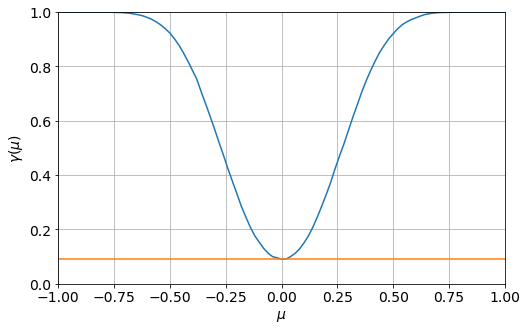

In [8]:
plot(mu_m,gamma_m);
plot(mu_m,mu_m*0+alpha);
xlabel(r'$\mu$');
ylabel(r'$\gamma(\mu)$');
ylim(0,1);
xlim(-1,1);
grid(True);

<font color="brown">
We can see by eye that $\gamma(\mu)$ is about $\alpha$ when $\mu=0$, and also check in the array:
</font>

In [9]:
mu_m[50]

0.0

In [10]:
gamma_m[50]

0.0907

In [11]:
print('gamma(%g)=%g' % (mu_m[50],gamma_m[50]))

gamma(0)=0.0907


## More on Homework

- Many/most problems not so explicitly computational (2/3 come from textbook)
  - Notebook still a useful format; often need to compute **something**
  - Unified format; don't need separate channel to submit "paper homework"
  - Considered making some problems self-checked;<br>opted to make everything notebooks to give practice before exam time
- Grading/feedback
  - Currently entering comments in new cells & returning notebooks
  - STAT 753 has O(10) students; can get away w/individual comments
  - More automated grading solution (nbgrader) exists

## Conclusions and References

- Jupyter notebooks
  - A way to mix explanations, math and code/demos
  - Being used for STAT 753 online lessons, homeworks and exams
- Other resources:
  - Jupyterhub for hosting notebooks in the cloud [[docs](https://jupyter.org/hub)] [[blog](https://developer.rackspace.com/blog/deploying-jupyterhub-for-education/)] [[talk](https://www.youtube.com/watch?v=OuhtpxGuboY)]
  - nbgrader for (semi-)automatic grading of notebooks [[docs](https://nbgrader.readthedocs.io/en/stable/)] [[talk](https://www.youtube.com/watch?v=5WUm0QuJdFw)]
  - This notebook [[download](http://ccrg.rit.edu/~whelan/talks/whelan20190925.ipynb)] [[view](https://nbviewer.jupyter.org/urls/ccrg.rit.edu/~whelan/talks/whelan20190925_static.ipynb)] [[run](https://mybinder.org/v2/gl/jtwsma%2F201909_webinar/master?filepath=whelan20190925.ipynb)]
- Any questions?